# Analysis

Let's check the TF

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
from anndata import AnnData

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
comparison = 'young.vs.old'
experiment = "RNAseq_abundances_adjusted_combat_inmose"


In [3]:
andata = pd.read_csv(f'/home/amore/work/data/{experiment}_gene_symbol_expression_clean.csv',index_col=0)
andata

,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,C4orf36.1,TUSC2P1,Unnamed: 34327,OR4M2-OT1,H2BK1,OR1Q1BP,Unnamed: 34331,Unnamed: 34332,TBCEL-TECTA,Age
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13758984,21281762,0,15759712,0,11295483,0,35294310,0,18333093,0,...,12741169,0,0,0,0,0,0,2773,0,91
SRR13758985,8542646,0,15035432,0,0,0,26637602,0,1389125,15716930,...,10663212,0,0,0,0,0,0,1328,0,86
SRR13758986,4079945,0,5410942,0,5658191,0,10946301,4491317,7747412,9046855,...,4248288,0,0,0,0,0,0,1,0,69
SRR13758987,14758557,0,12809471,0,0,0,24093106,0,11562944,16086208,...,10497182,0,0,0,0,0,0,1614,0,83
SRR13758988,3623061,0,15529838,23957067,0,0,25492722,10773730,12889518,0,...,10506926,0,0,0,0,0,0,795,0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1555210,37402439,0,21355420,1,1212397,1,87213838,3370216,5884457,951798,...,23486240,0,0,0,0,0,0,0,5351828,27
SRR1555211,48027788,0,89024445,1348907,24399,1,148387777,3685378,113719675,2233983,...,34582470,0,0,0,1956002,0,0,0,0,27
SRR1555212,84899250,0,167383416,407713,37284600,1,219777948,58357903,79405469,147215871,...,81916604,0,1537700,0,824055,0,1040940,12712840,5952181,27


In [4]:
dds = pd.read_csv(f'/home/amore/work/data/{experiment}_{comparison}_DDS.csv',index_col=0)
dds

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,6.652061e+07,-0.039065,0.104623,-0.373394,0.708855,0.907432
TNMD,1.376112e+05,-0.426688,1.395668,-0.305723,0.759815,0.924157
DPM1,9.614235e+07,-0.145930,0.158111,-0.922960,0.356028,0.693475
SCYL3,1.268802e+07,-1.493229,0.706095,-2.114769,0.034450,0.158123
FIRRM,3.481744e+07,-1.009579,0.447366,-2.256718,0.024026,0.123501
...,...,...,...,...,...,...
C4orf36.1,5.664924e+07,-0.351695,0.220923,-1.591932,0.111400,0.346605
Unnamed: 34327,5.890034e+05,-0.088741,1.216048,-0.072975,0.941826,0.982119
H2BK1,9.477206e+05,0.010106,1.014972,0.009957,0.992056,0.997164
Unnamed: 34332,5.902246e+06,1.001606,0.743051,1.347965,0.177670,0.466165


In [5]:
tf_df=pd.read_csv(f'results/tf_acts{experiment}_{comparison}.csv', index_col=0)
tf_df

,young.vs.old,pvals
ABL1,-1.809010,0.070461
AHR,-0.834095,0.404235
AHRR,-1.406230,0.159668
AIP,1.878036,0.060388
AIRE,-0.690838,0.489674
...,...,...
ZNF699,0.144145,0.885387
ZNF76,0.262173,0.793191
ZNF804A,0.395323,0.692608
ZNF91,0.816947,0.413966


In [6]:
tf_s = tf_df[tf_df['pvals']<0.1].index.to_list()


In [ ]:
pathway_df= pd.read_csv(f'results/pathway_acts_{experiment}_{comparison}.csv', index_col=0)


In [19]:
pathway_df[pathway_df['pvals']<0.1]

,young.vs.old,pvals
JAK-STAT,-3.527466,0.000420
NFkB,-2.948677,0.003194
TNFa,2.363546,0.018108
p53,-1.724524,0.084626


In [9]:
mat = pd.read_csv(f'results/mat_{experiment}_{comparison}.csv', index_col=0)
mat =mat.T
mat

,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,Unnamed: 34318,Unnamed: 34319,PDGFRL2P,POLR2J3.1,Unnamed: 34322,C4orf36.1,Unnamed: 34327,H2BK1,Unnamed: 34332,TBCEL-TECTA
young.vs.old,-0.373394,-0.305723,-0.92296,-2.114769,-2.256718,-0.22918,-3.591853,-1.408615,-2.504045,-2.09685,...,-0.061354,-1.754382,0.38343,-0.101156,0.174517,-1.591932,-0.072975,0.009957,1.347965,0.490102


In [10]:
collectri = dc.get_collectri(organism='human', split_complexes=True)


In [12]:
tf_acts = pd.DataFrame(tf_df['young.vs.old'])
tf_acts = tf_acts.T


In [ ]:
dc.plot_barplot(
    acts=tf_acts,
    contrast=comparison,
    top=100,
    vertical=True,
    figsize=(3, 30)
)

In [14]:
relevant_tf = collectri.query('source in @tf_s')

In [ ]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=tf_s,
    n_targets=5,
    node_size=50,
    figsize=(70, 70),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save=f'/home/amore/work/figures/{experiment}_{comparison}_all_relevant_network_TF.jpg'
)

In [15]:
relevant_tf.to_csv('../data/tf_network.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(3,3), tight_layout=True, sharey=True)
sns.heatmap(mat, cmap='viridis', ax=ax)
plt.show()

In [21]:
enr_pvals= pd.read_csv(f'results/enr_pvals_{experiment}_{comparison}.csv', index_col=0)
enr_pvals

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
0,AAACCAC_MIR140,110,0.145455,0.845018,1.0,0.839123,0.141306,BAZ2B;C1orf21;DTNA;EYA2;GYS1;HNRNPH3;KATNBL1;M...
1,AAAGACA_MIR511,204,0.191176,0.334298,1.0,1.087381,1.191467,AGBL3;ATRX;BTG1;BUB3;C1orf21;CAMK2N1;CCNT2;CEP...
2,AAAGGAT_MIR501,127,0.212598,0.179120,1.0,1.214805,2.089099,BCL6;BCLAF1;CELF2;CHODL;CLK1;ERRFI1;H2AX;HOXB8...
3,AAAGGGA_MIR204_MIR211,224,0.156250,0.824404,1.0,0.888295,0.171525,ANKRD13A;AP1S1;ARHGAP29;CCNT2;CCPG1;CHD5;DCAF5...
4,AAANWWTGC_UNKNOWN,194,0.195876,0.280094,1.0,1.114589,1.418461,ANK3;BCL6;BNC2;CACNG3;CDC42EP3;CHD2;DCHS2;DDIT...
...,...,...,...,...,...,...,...,...
30895,chrXq25,12,0.250000,0.362146,1.0,1.575448,1.600195,SH2D1A;STAG2;XIAP
30896,chrXq26,74,0.121622,0.927801,1.0,0.716471,0.053691,ARHGAP36;CCDC160;HTATSF1;INTS6L;MAP7D3;PHF6;RB...
30897,chrXq27,28,0.107143,0.897098,1.0,0.690433,0.074975,ATP11C;LDOC1;MCF2
30898,chrXq28,114,0.096491,0.994837,1.0,0.563502,0.002917,ARHGAP4;FATE1;FUNDC2;L1CAM;MTMR1;PNCK;RPL10;SM...


In [46]:
filter_enr = enr_pvals[enr_pvals['FDR p-value']<0.1]
filter_enr.to_csv(f'results/enr_pvals_{experiment}_{comparison}_filtered.csv')

In [88]:
filter_enr[filter_enr['Term'].str.contains("muscle", case=False, na=False)]

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
17750,HP_ABNORMAL_MITOCHONDRIA_IN_MUSCLE_TISSUE,38,0.552632,2.106086e-07,0.000203,3.154022,48.487609,AFG3L2;MT-CO1;MT-CO2;MT-CO3;MT-ND1;MT-ND2;MT-N...
20384,HP_MUSCLE_ABNORMALITY_RELATED_TO_MITOCHONDRIAL...,78,0.384615,1.270027e-05,0.006433,2.195600,24.752951,COA3;COA8;COX6B1;ETHE1;ISCU;MT-ATP6;MT-CO1;MT-...
21064,HP_RAGGED_RED_MUSCLE_FIBERS,46,0.413043,1.607201e-04,0.064497,2.366186,20.670636,CHCHD10;COQ2;MT-ATP6;MT-ATP8;MT-CO1;MT-CO2;MT-...
28472,RUBENSTEIN_SKELETAL_MUSCLE_SMOOTH_MUSCLE_CELLS,441,0.244898,2.078662e-04,0.078330,1.394288,11.821633,ADI1;ALDOA;ANP32B;ARID5B;ATP5F1A;ATP5F1C;ATP5F...


In [94]:
filter_enr.sort_values(by='Overlap ratio', ascending=False)

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
21100,HP_RECURRENT_MYOGLOBINURIA,5,1.000000,1.770284e-04,0.070130,5.631742,48.653746,COQ2;LPIN1;MT-CO1;MT-CO3;PYGM
20076,HP_LEBER_OPTIC_ATROPHY,10,0.900000,1.476153e-06,0.001037,5.099857,68.471044,MT-ATP6;MT-CO3;MT-CYB;MT-ND1;MT-ND2;MT-ND4;MT-...
26075,MT,15,0.866667,1.272871e-08,0.000016,4.913684,89.327856,MT-ATP6;MT-ATP8;MT-CO1;MT-CO2;MT-CO3;MT-CYB;MT...
21190,HP_RETINAL_ARTERIAL_TORTUOSITY,12,0.833333,1.447252e-06,0.001037,4.735676,63.675163,MT-ATP6;MT-CO3;MT-CYB;MT-ND1;MT-ND2;MT-ND4;MT-...
18607,HP_CENTROCECAL_SCOTOMA,13,0.769231,5.263557e-06,0.003189,4.384666,53.294316,MT-ATP6;MT-CO1;MT-CO3;MT-CYB;MT-ND1;MT-ND2;MT-...
...,...,...,...,...,...,...,...,...
28851,STEIN_ESRRA_TARGETS_UP,383,0.258486,4.377956e-05,0.019053,1.472532,14.778839,ACACB;ADCY1;AFG3L2;ATP5F1C;ATP5MC1;ATP5MC3;ATP...
9774,GOCC_ORGANELLE_INNER_MEMBRANE,558,0.256272,1.658884e-06,0.001136,1.463889,19.483435,AFG3L2;ARL6IP6;ATP1B4;ATP5F1A;ATP5F1C;ATP5F1D;...
1785,ERWIN_COHEN_BLOOD_LIVE_VACCINE_TC_83_AGE_23_48...,682,0.250733,7.397987e-07,0.000618,1.434301,20.247869,ADD3;AGPAT5;AKAP7;ALG13;ANK3;ANKRD36B;ATAD1;AT...
28472,RUBENSTEIN_SKELETAL_MUSCLE_SMOOTH_MUSCLE_CELLS,441,0.244898,2.078662e-04,0.078330,1.394288,11.821633,ADI1;ALDOA;ANP32B;ARID5B;ATP5F1A;ATP5F1C;ATP5F...


In [96]:
filter_enr.sort_values(by='Combined score', ascending=False)[:20]

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
29655,WP_ELECTRON_TRANSPORT_CHAIN_OXPHOS_SYSTEM_IN_M...,103,0.553398,8.860742e-18,2.737969e-13,3.159687,124.064817,ATP5F1A;ATP5F1C;ATP5F1D;ATP5F1E;ATP5MC1;ATP5MC...
27925,REACTOME_RESPIRATORY_ELECTRON_TRANSPORT_ATP_SY...,127,0.503937,4.848830e-17,7.491443e-13,2.879465,108.167714,ATP5F1A;ATP5F1C;ATP5F1D;ATP5F1E;ATP5MC1;ATP5MC...
28214,REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRA...,178,0.443820,1.447032e-16,1.490443e-12,2.539482,92.619590,ATP5F1A;ATP5F1C;ATP5F1D;ATP5F1E;ATP5MC1;ATP5MC...
7055,GOBP_PROTON_MOTIVE_FORCE_DRIVEN_ATP_SYNTHESIS,76,0.552632,1.909365e-13,8.428481e-10,3.150467,92.267217,ATP5F1A;ATP5F1C;ATP5F1D;ATP5F1E;ATP5MC1;ATP5MC...
26075,MT,15,0.866667,1.272871e-08,1.573269e-05,4.913684,89.327856,MT-ATP6;MT-ATP8;MT-CO1;MT-CO2;MT-CO3;MT-CYB;MT...
29971,WP_OXIDATIVE_PHOSPHORYLATION,60,0.566667,1.457227e-11,3.091968e-08,3.229030,80.570434,ATP5F1A;ATP5F1D;ATP5F1E;ATP5MC1;ATP5MC3;ATP5ME...
9593,GOCC_INNER_MITOCHONDRIAL_MEMBRANE_PROTEIN_COMPLEX,157,0.439490,2.166489e-14,1.338890e-10,2.511498,79.019474,AFG3L2;ATP5F1A;ATP5F1C;ATP5F1D;ATP5F1E;ATP5MC1...
9899,GOCC_RESPIRASOME,100,0.490000,8.636685e-13,2.668736e-09,2.795306,77.646843,COX4I1;COX5B;COX6B1;COX6C;COX7A2;COX7C;CYCS;HI...
5860,GOBP_OXIDATIVE_PHOSPHORYLATION,146,0.445205,5.791960e-14,2.982859e-10,2.543168,77.515039,ATP5F1A;ATP5F1C;ATP5F1D;ATP5F1E;ATP5ME;ATP5MF;...
27924,REACTOME_RESPIRATORY_ELECTRON_TRANSPORT,103,0.485437,7.993959e-13,2.668736e-09,2.769489,77.143882,COQ10A;COX4I1;COX5B;COX6B1;COX6C;COX7C;CYCS;ET...


In [91]:
filter_enr[filter_enr['Term'].str.contains("fat", case=False, na=False)]

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
29939,WP_NONALCOHOLIC_FATTY_LIVER_DISEASE,154,0.324675,0.000007,0.003926,1.850533,21.934687,ATF4;COX4I1;COX5B;COX6B1;COX6C;COX7A2;COX7C;CY...


In [44]:
terms = filter_enr['Term'].to_list()
terms = ' '.join(terms)
terms = terms.replace("_", " ")
terms = terms.replace("GOBP ", " ")
terms = terms.replace("HP ", " ")
terms = terms.replace("GOMF ", " ")
terms = terms.replace("GOCC ", " ")
terms = terms.replace("KEGG ", " ")
terms = terms.replace("REACTOME ", " ")
terms = terms.replace("CELL ", " ")
terms = terms.replace("ACTIVITY ", " ")
#terms

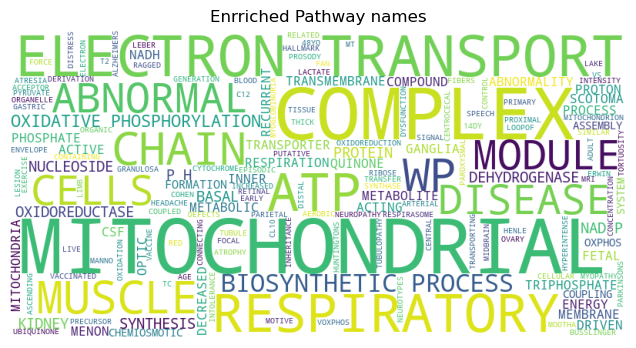

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(terms)

# Plot the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Enrriched Pathway names")
plt.show()

In [51]:
gsea_scores, normalize_scores, pvalue =dc.method_gsea.run_gsea(mat, collectri)


In [71]:
gsea_scores = res_gsea[0]
normalize_scores = res_gsea[1]
pvalue=res_gsea[2] 

In [72]:
res_gsea_df = pd.DataFrame(gsea_scores.T)
res_gsea_df['normalize']=normalize_scores.T
res_gsea_df['pvals']=pvalue.T
res_gsea_df.to_csv(f'results/res_gsea_{experiment}_{comparison}.csv')
res_gsea_df

,young.vs.old,normalize,pvals
source,,,
ABL1,-0.732640,-1.598530,0.006964
AHR,-0.320530,-1.096563,0.303313
AHRR,-0.639627,-1.170676,0.260606
AIP,-0.861333,-1.587112,0.002915
AIRE,-0.498236,-1.262595,0.180879
...,...,...,...
ZNF699,-0.334038,-0.978453,0.530588
ZNF76,-0.438742,-0.875341,0.659664
ZNF804A,0.248556,0.635848,0.925197


In [82]:
#ages=andata['Age']
#adata=andata.drop('Age',axis=1)
adata=AnnData(andata.to_numpy(), obs=pd.DataFrame(ages))
adata.obs_names = andata.index
adata.var_names = andata.columns
adata

AnnData object with n_obs × n_vars = 270 × 34333
    obs: 'Age'

In [84]:
progeny = dc.get_progeny()

In [86]:
dc.run_mlm(
    mat=andata,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True
)

96 features of mat are empty, they will be removed.
Running mlm on mat with 270 samples and 34237 targets for 14 sources.


(             Androgen      EGFR  Estrogen   Hypoxia  JAK-STAT      MAPK  \
 SRR13758984  1.059582 -0.034748 -0.069180  0.115450 -0.141564 -0.109085   
 SRR13758985  1.000796 -0.035502 -0.058618  0.250970 -0.125907 -0.102390   
 SRR13758986  0.849548 -0.049032 -0.086486  0.445213 -0.158636 -0.088316   
 SRR13758987  1.245639 -0.060531 -0.073076  0.201709 -0.157872 -0.096357   
 SRR13758988  0.988814 -0.062339 -0.070654  0.561145 -0.141948 -0.098709   
 ...               ...       ...       ...       ...       ...       ...   
 SRR1555210   0.570109 -0.033439 -0.069451  0.267191 -0.171158 -0.094566   
 SRR1555211   1.243361 -0.047972 -0.080351  0.358280 -0.184355 -0.102734   
 SRR1555212   0.929285 -0.067474 -0.060757  0.278019 -0.141833 -0.080958   
 SRR1555213   0.519318 -0.013216 -0.070388  0.263896 -0.195083 -0.131424   
 SRR1555214   1.195213 -0.045684 -0.077499  0.349261 -0.165719 -0.093023   
 
                  NFkB      PI3K      TGFb      TNFa     Trail      VEGF  \
 SRR137589